# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

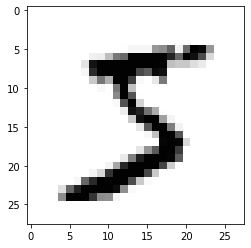

In [4]:
# Hint: x_train[0].reshape()
x_train = x_train.reshape((-1, 28, 28))
plt.imshow(x_train[0]).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [5]:
y_train.shape

(60000,)

In [6]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

내가 만든 모델을 확인해 봅시다.

#### My Own Model 

In [8]:
x_train = x_train.reshape((-2, 28*28))

In [14]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
droprate_list = [0.2, 0.3, 0.4]

for optimizer in optimizer_list[1:2]:
  for dropout_rate in droprate_list:
    for act1 in activation_list:
      for act2 in activation_list:
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, input_dim=784, activation = act1,
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()),
            tf.keras.layers.Dense(256, activation = act2,
                                  activity_regularizer = regularizer),
            tf.keras.layers.Dropout(dropout_rate)
            ])

        model.compile(loss = loss_list[0], 
                      optimizer = optimizer,
                      metrics = ["accuracy"])

        model.fit(x_train, y_train)
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

        print(f'optimizer = "{optimizer}"')
        print(f'loss = "{loss_list[0]}"')
        print(f'dropout_rate = "{dropout_rate}"')
        print(f'act1 = "{act1}"')
        print(f'act2 = "{act2}"')
        print('\nAccuracy:', test_acc)
        print('-----------------------')

1875/1875 [==============================] - 5s 2ms/step - loss: 2.2318 - accuracy: 0.6265
313/313 - 1s - loss: 0.2996 - accuracy: 0.9306 - 708ms/epoch - 2ms/step
optimizer = "adam"
loss = "sparse_categorical_crossentropy"
dropout_rate = "0.2"
act1 = "sigmoid"
act2 = "sigmoid"

Accuracy: 0.9305999875068665
-----------------------
1875/1875 [==============================] - 5s 2ms/step - loss: 5.7771 - accuracy: 0.1022
313/313 - 1s - loss: 5.5452 - accuracy: 0.0980 - 713ms/epoch - 2ms/step
optimizer = "adam"
loss = "sparse_categorical_crossentropy"
dropout_rate = "0.2"
act1 = "sigmoid"
act2 = "relu"

Accuracy: 0.09799999743700027
-----------------------
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3927 - accuracy: 0.7125
313/313 - 1s - loss: 0.3871 - accuracy: 0.9242 - 701ms/epoch - 2ms/step
optimizer = "adam"
loss = "sparse_categorical_crossentropy"
dropout_rate = "0.2"
act1 = "sigmoid"
act2 = "softmax"

Accuracy: 0.9241999983787537
-----------------------
1875/1

KeyboardInterrupt: ignored

In [17]:
optimizer = "adam"
dropout_rate = 0.2
act1 = "tanh"
act2 = "sigmoid"

model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, input_dim=784, activation = act1,
                              kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dense(256, activation = act2,
                              activity_regularizer = regularizer),
        tf.keras.layers.Dropout(dropout_rate)
        ])

model.compile(loss = loss_list[0], 
              optimizer = optimizer,
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs=100)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nAccuracy:', test_acc)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9034 - accuracy: 0.6837
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2994 - accuracy: 0.7696
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2341 - accuracy: 0.7812
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2297 - accuracy: 0.7817
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2105 - accuracy: 0.7852
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1701 - accuracy: 0.7920
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1802 - accuracy: 0.7904
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1695 - accuracy: 0.7922
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1545 - accuracy: 0.7946
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

내가 만든 모델을 확인해 봅시다.

In [18]:
model.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 256)               200960    
                                                                 
 dense_203 (Dense)           (None, 256)               65792     
                                                                 
 dropout_100 (Dropout)       (None, 256)               0         
                                                                 
Total params: 266,752
Trainable params: 266,752
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [ ]:
model.fit()

95%이상의 성능을 가진 모델을 만들면 완성!

In [19]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1674 - accuracy: 0.9791 - 618ms/epoch - 2ms/step

Accuracy: 0.9790999889373779


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)